### Statistics Practical Implementation

##### 1. Measure of Central Tendency: Mean, Median, Mode

In [34]:
ages = [23,24,32,45,12,43,67,45,32,56,32]

a. Mean, median using numpy

In [35]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

37.36363636363637
32.0


In [36]:
ages1 = [23,24,32,45,12,43,67,45,32,56,32,400]

In [37]:
print(np.mean(ages1))
print(np.median(ages1))

67.58333333333333
37.5


Addition of a far larger value(maybe outlier) causes a great increase in mean, but slight difference in median. i.e. Mean is largely affected by outlier but not median 

b. using statistics

In [38]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

37.36363636363637
32


In [39]:
statistics.mode(ages) 

32

<Axes: >

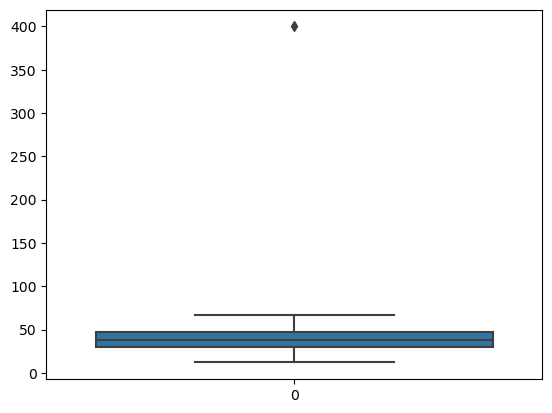

In [40]:
import seaborn as sns
sns.boxplot(ages1)   #boxplot is used to detect outliers

### 5 Number Summary

In [41]:
import numpy as np
q1,q3 = np.percentile(ages1,[25,75])

In [42]:
print(q1,q3)

30.0 47.75


In [43]:
## to check outlier(lower fence - higher fence)
IQR = q3-q1
lower_fence = q1 - 1.5*(IQR)
higher_fence = q3 + 1.5*(IQR)
print(lower_fence, higher_fence)

3.375 74.375


#### 2. Measure of Dispersion

1. Variance 2. Standard Deviation

In [45]:
np.var(ages1,axis=0)

10252.909722222224

In [46]:
statistics.variance(ages1)

11184.992424242424

Difference is because statistics uses sample variance formula whereas numpy uses population variance formula

In [51]:
def popnvariance(data):
    n = len(ages1)
    ## mean of data
    mean = sum(data)/n
    ## variance
    deviation = [(x-mean)**2 for x in data]
    variance = sum(deviation)/n
    return variance

In [52]:
popnvariance(ages1)

10252.909722222224

In [53]:
def samplevariance(data):
    n = len(ages1)
    ## mean of data
    mean = sum(data)/n
    ## variance
    deviation = [(x-mean)**2 for x in data]
    variance = sum(deviation)/(n-1)
    return variance

In [54]:
samplevariance(ages1)

11184.992424242426

Using degree of freedom(dof), where dof=0 means population variance and 1 means sample variance

In [55]:
def variance(data, dof=0):
    n = len(ages1)
    ## mean of data
    mean = sum(data)/n
    ## variance
    deviation = [(x-mean)**2 for x in data]
    variance = sum(deviation)/(n-dof)
    return variance

In [56]:
variance(ages1, dof=1)

11184.992424242426

In [57]:
statistics.pvariance(ages1)

10252.909722222223

In [58]:
import math 
print("Standard Deviation")
math.sqrt(statistics.pvariance(ages1))

Standard Deviation


101.25665273068344

#### 3. Histograms and PDF

<Axes: ylabel='Count'>

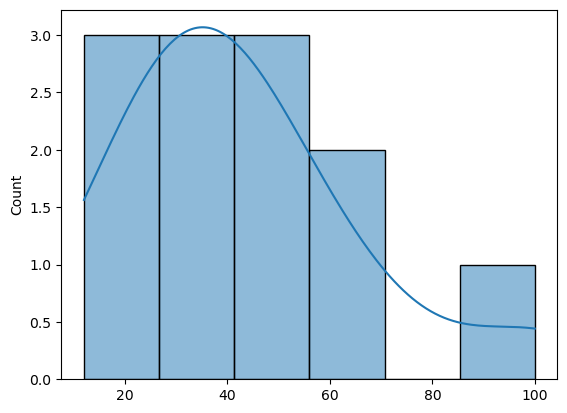

In [62]:
age = [23,24,32,45,12,43,67,45,32,56,32,100]
import seaborn as sns
sns.histplot(age, kde= True)

In [63]:
df = sns.load_dataset('iris')

In [64]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

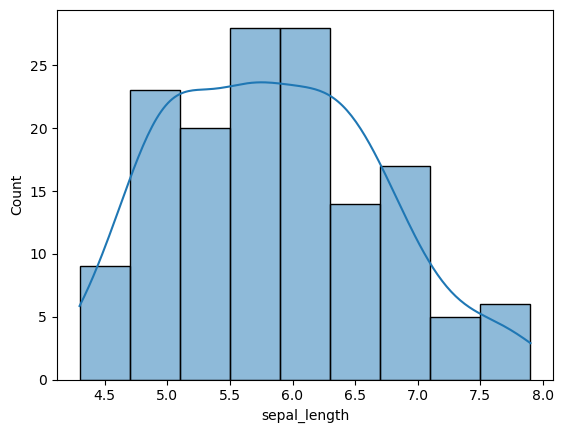

In [65]:
sns.histplot(df['sepal_length'], kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

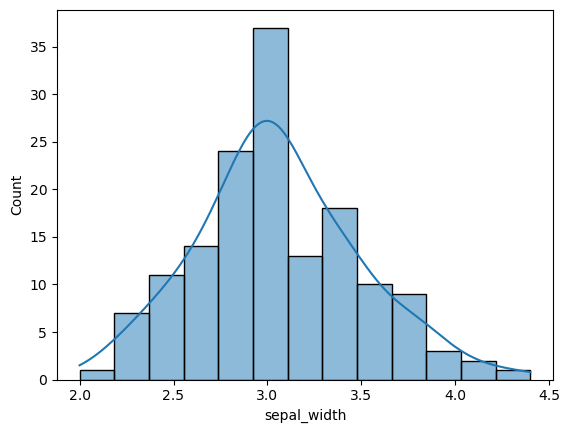

In [67]:
sns.histplot(df['sepal_width'], kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

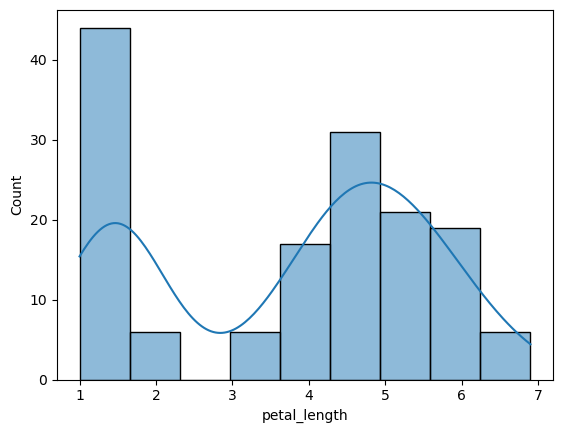

In [68]:
sns.histplot(df['petal_length'], kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

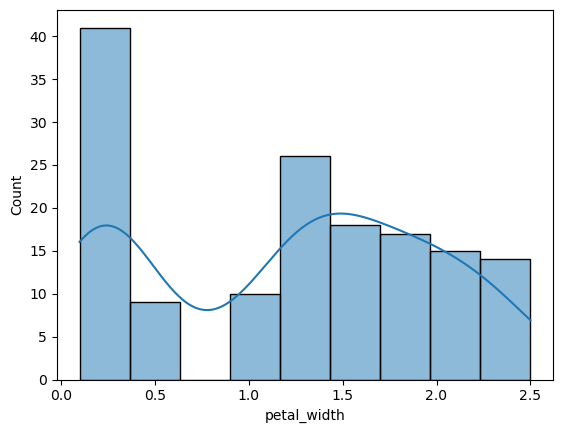

In [69]:
sns.histplot(df['petal_width'], kde=True)

From the kde graph, sepal width data seems to be normally distributed, but we will perfrom QQ plot to verify it

In [72]:
## create a normal distributed data
s = np.random.normal(0.5,0.2,1000)   #mean->0.5 , sd->0.2, 1000data

<Axes: ylabel='Count'>

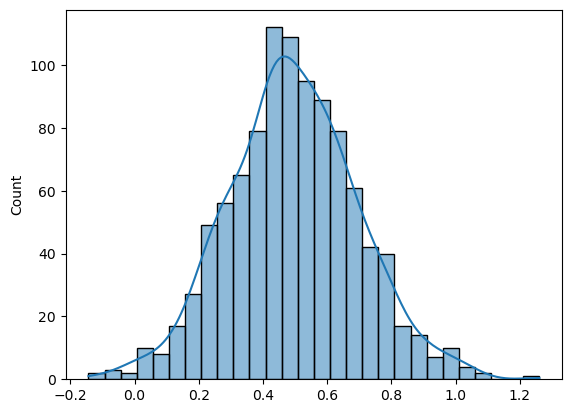

In [73]:
sns.histplot(s,kde=True)

## Other distribution
Log Normal Distribution, Power Law Distribution

In [95]:
mu, sigma = 3, 1  #mean and s.d.
s = np.random.lognormal(mu, sigma,1000)

<Axes: ylabel='Count'>

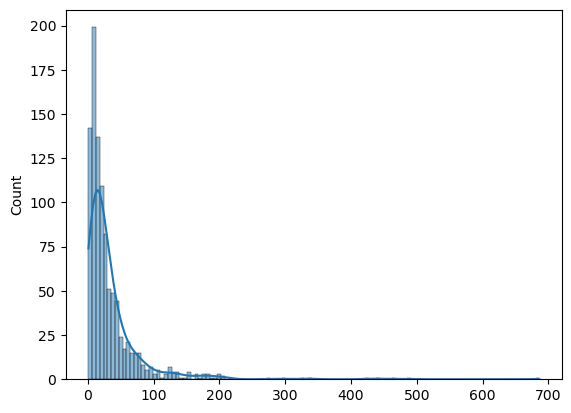

In [96]:
sns.histplot(s, kde= True)

<Axes: ylabel='Count'>

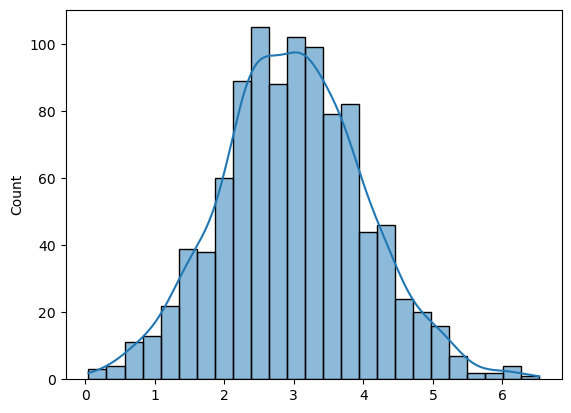

In [97]:
sns.histplot(np.log(s), kde=True)  #converting log normal to normal distribution

### Check whether distribution is normal distribution

In [98]:
#### If you want to check whether feature is gaussian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
#function to check whether normally distributed
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample, dist='norm', plot=pylab)
    plt.show()

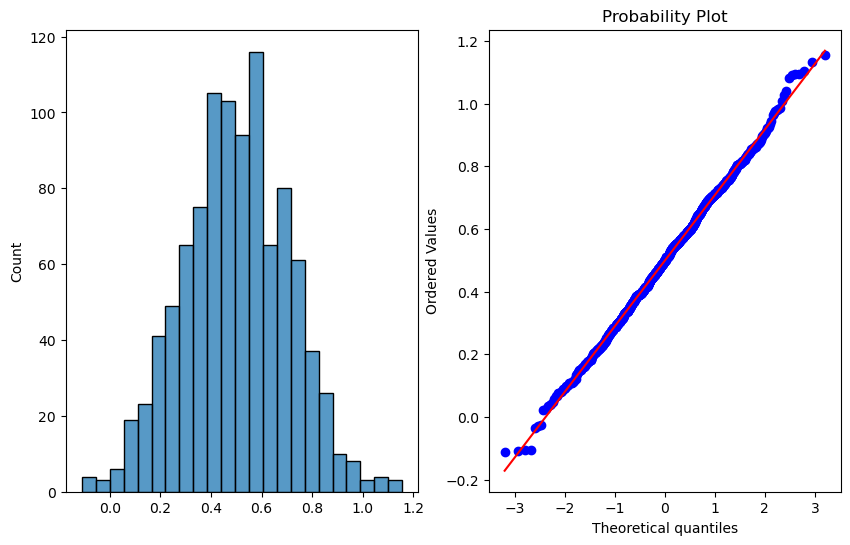

In [99]:
s = np.random.normal(0.5,0.2,1000)
plot_data(s)

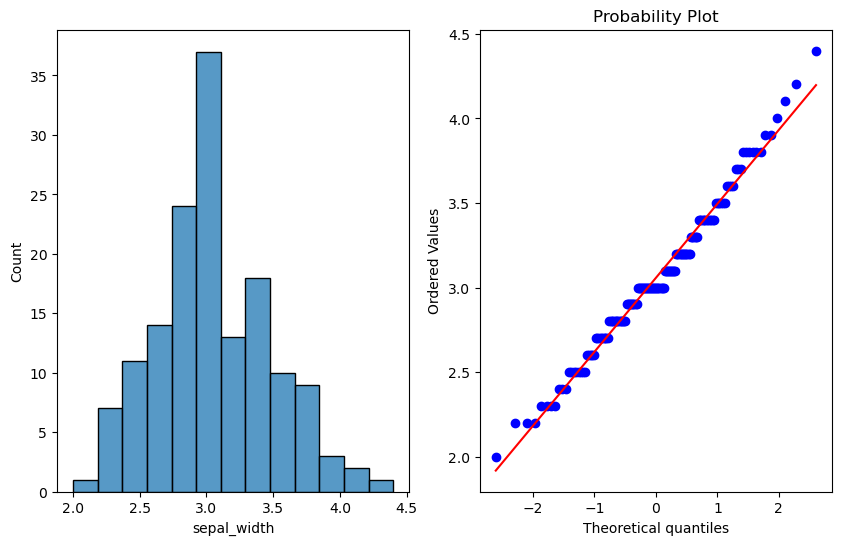

In [100]:
plot_data(df['sepal_width'])

Straight line means, normally distributed

In [103]:
mu, sigma = 3,1
sample = np.random.lognormal(mu,sigma,100)

In [106]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample), dist='norm', plot=pylab)
    plt.show()

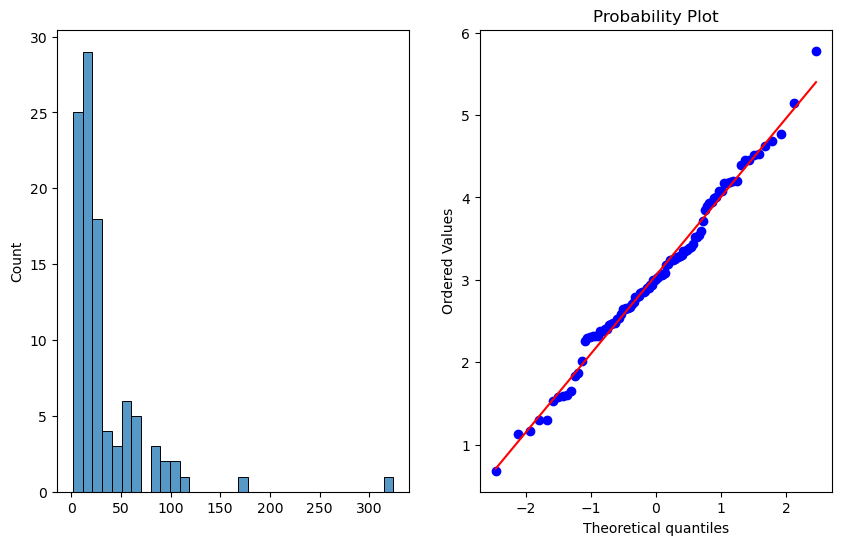

In [107]:
plot_data_log(sample)

### Pearson and Sperman Rank Correlation

In [108]:
df = sns.load_dataset('tips')

In [109]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [110]:
import pandas as pd

In [111]:
df.corr()

C:\Users\Garima\AppData\Local\Temp\ipykernel_1332\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


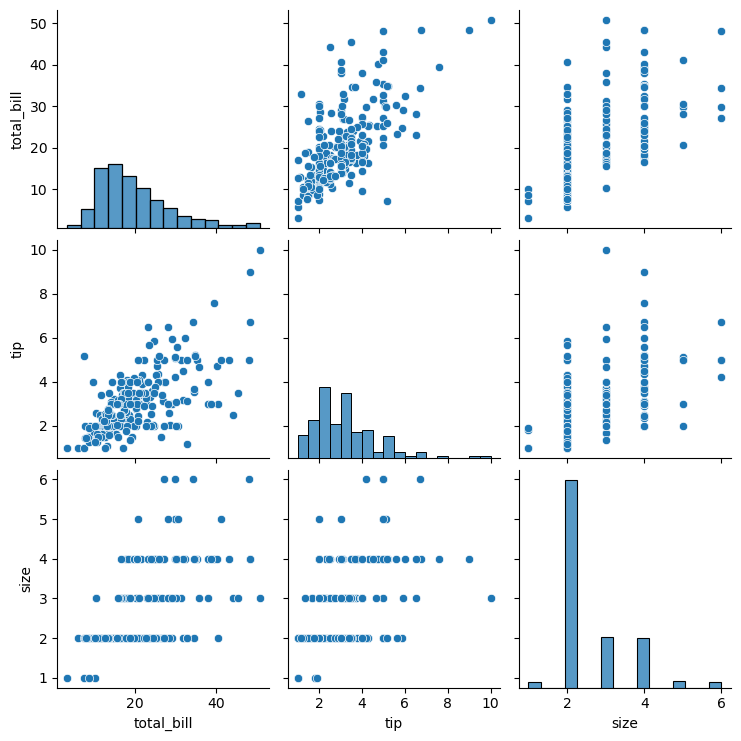

In [113]:
sns.pairplot(df)